In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Heart.csv")

In [3]:
print(data.shape)

(303, 15)


In [4]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
print("columns:", data.columns)


columns: Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')


In [6]:
data.isnull()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [8]:
data.isnull().sum()/data.shape[0]*100

Unnamed: 0    0.000000
Age           0.000000
Sex           0.000000
ChestPain     0.000000
RestBP        0.000000
Chol          0.000000
Fbs           0.000000
RestECG       0.000000
MaxHR         0.000000
ExAng         0.000000
Oldpeak       0.000000
Slope         0.000000
Ca            1.320132
Thal          0.660066
AHD           0.000000
dtype: float64

In [9]:
import  seaborn as sns
import matplotlib.pyplot as plt

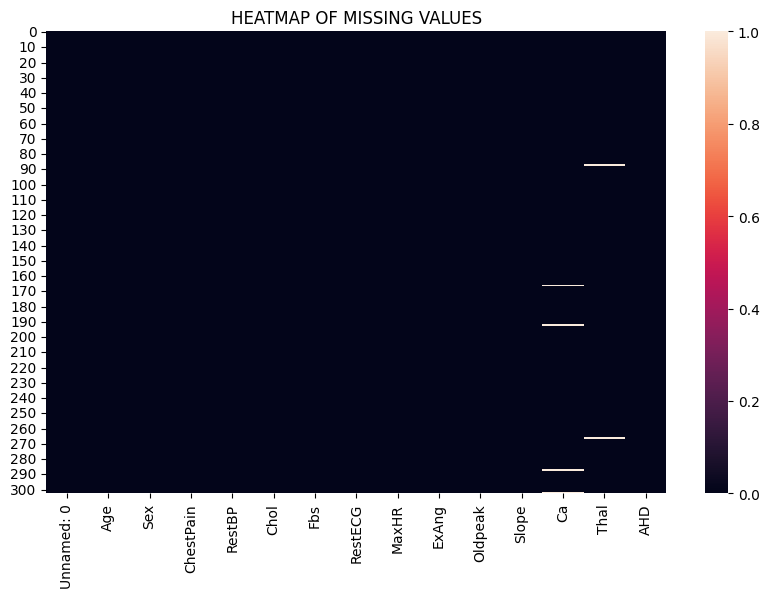

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())
plt.title('HEATMAP OF MISSING VALUES')
plt.show()

In [11]:
data['Ca'] = data['Ca'].fillna(data['Ca'].mean())
data['Thal'] = data['Thal'].fillna(data['Thal'].mode()[0])


In [12]:
data.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

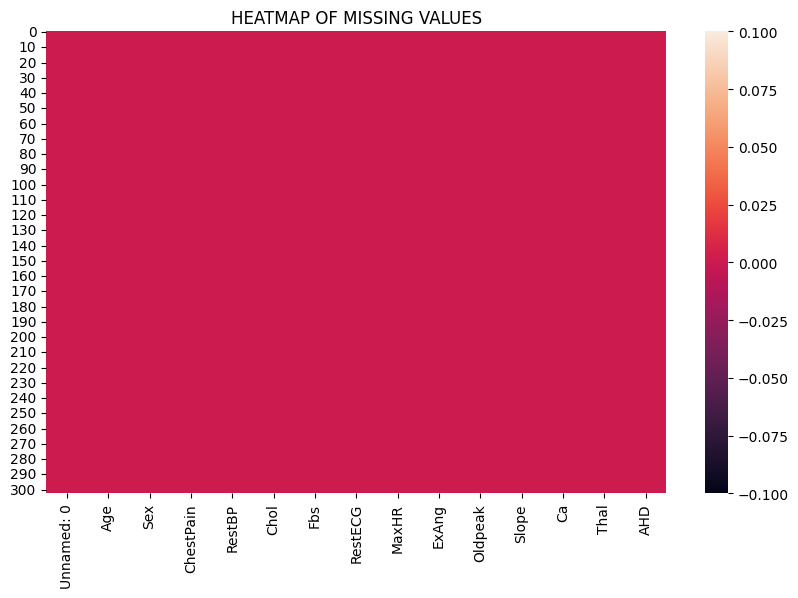

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())
plt.title('HEATMAP OF MISSING VALUES')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
#Selecting Numeric and Categorical Columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_cols])
data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_cols)
data_final = pd.concat([data_scaled_df, data[categorical_cols].reset_index(drop=True)], axis=1)

In [16]:
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

In [17]:
print("Number of training samples:", train_data.shape[0])
print("Number of testing samples:", test_data.shape[0])

Number of training samples: 227
Number of testing samples: 76
